# Primer on Python - Part 3 of 3

In this third part, we will use the **numpy** and **matplotlib** libraries to:
1. Simulate correlation matrices
2. Summarise 3D data
3. Plot heatmaps

NumPy is a popular library for scientific computing, with n-dimensional arrays and numerical computing tools. It is conceptually similar to MATLAB (note that the implementation is quite different).

Matplotlib is the primary plotting library for Python, with a MATLAB-like interface. It allows a high level of customisation, but also requires more coding. Neuroimaging toolbox functions often build on this library, so it is useful to understand its grammar.

# 1. Simulate correlation matrices

Let's start with some foundational concepts, and then we shall simulate correlation matrices for our 16 subjects.

## Arrays:

Python lists can be used as arrays (there is no separate built in data type), but NumPy arrays can be up to 50x faster and are frequently used in data science.

In [ ]:
import numpy as np

arr = np.array([1, 2, 3])

print(arr)

In [ ]:
type(arr)

*** 

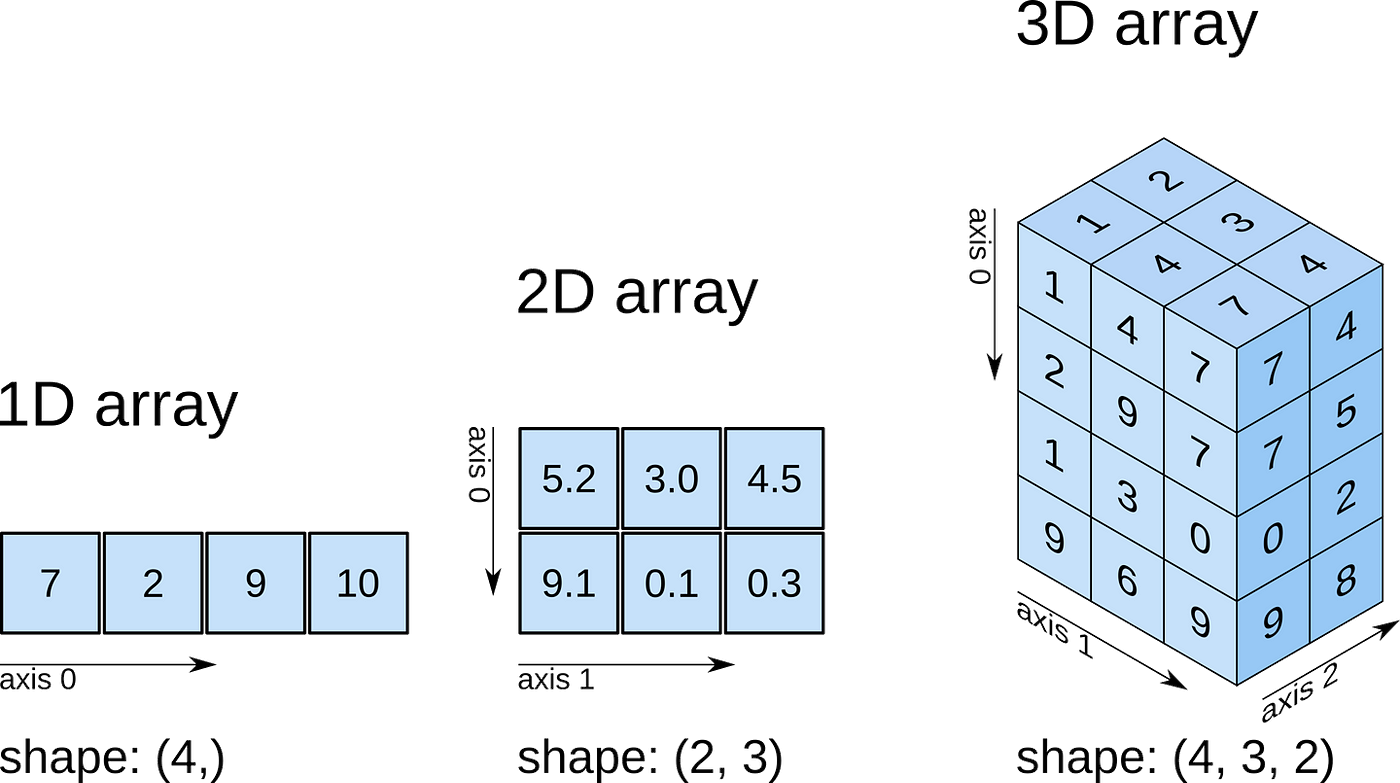

***

In [ ]:
# 1-D arrays

arr = np.array([7, 2, 9, 10])

print(arr)

In [ ]:
# 2-D arrays

arr = np.array([[5.2, 3.0, 4.5], [9.1, 0.1, 0.3]])

print(arr)

In [ ]:
# 3-D arrays

arr = np.array([[[1, 4, 7], [2, 9, 7], [1, 3, 0], [9, 6, 9]], [[2, 3, 4], [0, 0, 5], [0, 0, 2], [0, 0, 8]]])

print(arr)

In [ ]:
# Check number of dimensions

arr.ndim

In [ ]:
# Exercise: create the following 3d array (use 0's for the cells you can't see)

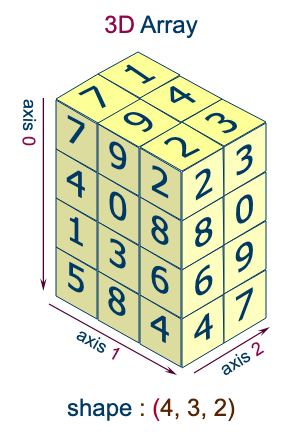

## Random number generation:

We will use the numpy module random, which we can import directly without needing to import the entire library

In [ ]:
from numpy import random

In [ ]:
# A random number between 0 and 1

random.rand()

In [ ]:
# 1-D array of random numbers

arr = random.rand(5)

print(arr)

In [ ]:
# 2-D array of random numbers

arr = random.rand(3, 5)

print(arr)

In [ ]:
# Random integer from 0 to n

random.randint(10)

In [ ]:
# 2-D array of random numbers from a sample space

arr = random.choice(range(5,10), size=(3,5))

print(arr)

In [ ]:
# Choose with probability

arr = random.choice([3, 5, 7, 9], p=[0.1, 0.3, 0.6, 0.0], size=(3, 5))

print(arr)

In [ ]:
# Choose from a random normal distribution 

arr = random.normal(size=(3,5))

print(arr)

In [ ]:
# You can also specify the mean and standard deviation of the distribution

arr = random.normal(loc=2, scale=3, size=(3,5))

print(arr)
print(arr.mean())
print(arr.std())

In [ ]:
# Similar functions exist for other distributions such as binomial, logistic, chi square, etc.

arr1 = random.uniform(size=(3,5))
arr2 = random.logistic(size=(3,5))
arr3 = random.chisquare(df=2, size=(3,5))

## Generate data:

So now let's generate raw data and then correlation matrices for our 16 subjects.

### Raw data matrices

In [ ]:
# Simulate raw data for single subject, say 5 signals/timeseries of length 15. Say we want the raw data to be in the range of 0-10, so let's multiply by 10.

raw = random.rand(5, 15) * 10

print(raw.shape)

In [ ]:
print(raw)

In [ ]:
# Accessing each timeseries

signal1 = raw[0, :]
signal2 = raw[1, :]
signal3 = raw[2, :]
signal4 = raw[3, :]
signal5 = raw[4, :]

print(signal1)

In [ ]:
signal1.mean()

In [ ]:
# Let's visualise these (Seaborn)

import seaborn as sns
sns.lineplot(data=np.transpose(raw))

In [ ]:
# Say we want to drop the first 4 points of each signal

processed = raw[:, 4:]

print(processed.shape)

In [ ]:
sns.lineplot(data=np.transpose(processed))

In [ ]:
# Now let's do this for 16 subjects: we will essentially stack 16 2-D arrays along the z-axis (or axis=2)

# First, define the shape
sub_raw = np.zeros(shape=(5, 15, 16)) # 5 signals, 15 timepoints, 16 subjects

# Generate and save 16 2D arrays
for i in range(16):
    sub_raw[:,:,i] = random.rand(5, 15)

In [ ]:
print(sub_raw.shape)

In [ ]:
print(sub_raw[:,:,0])

### Correlation matrices

In [ ]:
# Correlation matrix for a single subject

cormat = np.corrcoef(raw)

print(cormat)

In [ ]:
# Let's visualise this (Seaborn)

sns.heatmap(cormat)

In [ ]:
# Let's do this for 16 subjects: we will again stack 16 2-D arrays along the z-axis – this time 5 x 5 correlations matrices

subcor = np.zeros(shape=(5, 5, 16))

for i in range(16):
    raw = sub_raw[:,:,i]
    subcor[:,:,i] = np.corrcoef(raw)

print(subcor[:,:,0]) # Subject 1
print(subcor[:,:,1]) # Subject 2
print(subcor[:,:,2]) # Subject 3

## Functions:

Now imagine we wanted to vary the parameters of data generation, to change the number of signals, length of the signals or the number of subjects.

Instead of repeating the code block each time, we can write a function for the repeating block of code.

In [ ]:
# Format of a function

def custom_function():
    print('Function executed')

In [ ]:
# Call the function

custom_function()

In [ ]:
# In most cases, we need to pass some values to the function and get some values back

def custom_function(arg1, arg2):
    return arg1 * arg2

product = custom_function(2, 4)

print(product)

In [ ]:
# We can also return multiple values

def custom_function(arg1, arg2):
    s = arg1 + arg2
    p = arg1 * arg2
    return s, p

sum, product = custom_function(2, 4)

print(sum)
print(product)

In [ ]:
# Function to generate correlation matrices for n subjects, with variable number of signals and signal lengths

def gen_n_cormat(n, num_signal, signal_len):
    subcor = np.zeros(shape=(num_signal, num_signal, n))
    for i in range(n):
        raw = random.rand(num_signal, signal_len) * 10
        subcor[:,:,i] = np.corrcoef(raw)
    return subcor

In [ ]:
# Let's get the output for different values of the arguments

subcor1 = gen_n_cormat(n=16, num_signal=5, signal_len=15) # Same as before
subcor2 = gen_n_cormat(n=32, num_signal=5, signal_len=15) # Double the number of subjects
subcor3 = gen_n_cormat(n=16, num_signal=10, signal_len=15) # Double the number of signals
subcor4 = gen_n_cormat(n=16, num_signal=5, signal_len=30) # Double the lengths of signals

# Which gives us the largest matrix?

print(subcor1.size)
print(subcor2.size)
print(subcor3.size)
print(subcor4.size)

In [ ]:
## Finally, if your function only contains a single expression, you can turn it into a one-liner

# Instead of:
def myfunc(a):
    return a * 10

# You can:
mylambda = lambda a : a * 10

# Both give you the same output
print(myfunc(5))
print(mylambda(5))

# 2. Summarise 3D data

In [ ]:
# Our 3D stack of correlation matrices

subcor.shape

In [ ]:
# Group mean correlation matrix (3d array -> 2d array)

group_mean = np.mean(subcor, axis=2) # Note: axis 0 = rows, axis 1 = columns, axis 2 = subjects

print(group_mean)

In [ ]:
# Mean correlation for each subject (16 subjects) (3d array -> 1d array)

for i in range(16):
    print(subcor[:,:,i].mean())

In [ ]:
# Mean correlation for each signal (5 signals) (3d array -> 1d array)

for i in range(5):
    print(subcor[i,:,:].mean())

# 3. Plot data

Now we're going to use the **matplotlib.pyplot** module to plot our data

In [ ]:
import matplotlib.pyplot as plt

## Histogram:

Let's begin with a type of plot we've already seen

In [ ]:
## Plot distribution of values over all subjects 

# Flatten 3D data into 1D array
subcor_1D = subcor.flatten()

# Single histogram
plt.hist(subcor_1D)

# Add labels
plt.title('All Subjects (n=16)', fontsize=14)
plt.ylabel('Counts')
plt.xlabel('Correlations')

In [ ]:
## Plot distribution of values for each subject (n=16)

# Step 1: plot 4 x 4 subplots
fig, axs = plt.subplots(4, 4) # fig = overall figure, axs = individual plots

In [ ]:
# Step 1: plot 4 x 4 subplots
fig, axs = plt.subplots(4, 4)

# Step 2: Populate each subplot
axs[0, 0].hist(subcor[:,:,0].flatten())
axs[0, 0].set_title('Subject 1')
axs[0, 1].hist(subcor[:,:,1].flatten())
axs[0, 1].set_title('Subject 2')

In [ ]:
# Step 1: plot 4 x 4 subplots
fig, axs = plt.subplots(4, 4)

# Step 2: Populate each subplot
for i in range(4):
    for j in range(4):
        sub = i * 4 + j
        axs[i, j].hist(subcor[:,:,sub].flatten())
        axs[i, j].set_title('Subject ' + str(sub+1))

# Step 3: Set axis labels
for ax in fig.get_axes():
    ax.set(xlabel='Correlations', ylabel='Counts')
    ax.label_outer() # Keep only outer labels

# Step 4: Add figure title
fig.suptitle('Subject Correlations')

In [ ]:
## Plot distribution of values for each subject (n=16), add vertical red line at 0.5, save figure with reasonable proportions

fig, axs = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(12, 9))

for i in range(4):
    for j in range(4):
        sub = i * 4 + j
        axs[i, j].hist(subcor[:,:,sub].flatten())
        axs[i, j].set_title('Subject ' + str(sub+1))
        axs[i, j].axvline(0.5, ls='--', color='r')

for ax in fig.get_axes():
    ax.set(xlabel='Correlations', ylabel='Counts')
    ax.label_outer() # Keep only outer labels

fig.suptitle('Subject Correlations', fontsize=20)
fig.savefig('figures/subplots.png', transparent=False, dpi=80, bbox_inches="tight")

## Heatmaps:

In [ ]:
# Plot group mean heatmap

plt.imshow(group_mean)

In [ ]:
## Plot heatmaps for 4 subjects

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(9, 9))

for i in range(2):
    for j in range(2):
        sub = i * 2 + j
        axs[i, j].imshow(subcor[:,:,sub])
        axs[i, j].set_title('Subject ' + str(sub+1))

for ax in fig.get_axes():
    ax.set_xticks([])
    ax.set_yticks([])

fig.suptitle('Subject Correlations', fontsize=20)
fig.savefig('figures/sub_heatmaps.png', transparent=False, dpi=80, bbox_inches="tight")

# **Putting it all together**

In [ ]:
# --- Libraries --- #

import numpy as np
import matplotlib.pyplot as plt

# --- Generate data --- #

# Generate 10 x 10 correlation matrices for 20 subjects

subcor = np.zeros(shape=(10, 10, 20))
for i in range(20):
    raw = np.random.rand(10, 15) * 10
    subcor[:,:,i] = np.corrcoef(raw)

# Get group mean correlation matrix

group_mean = np.mean(subcor, axis=2)

# --- Plot data --- #

# Plot 1: single histogram

ax = plt.hist(subcor_1D)
plt.title('All Subjects (n=20)', fontsize=14)
plt.ylabel('Counts')
plt.xlabel('Correlations')
plt.savefig('figures/mpl_histogram.png', transparent=False, dpi=80, bbox_inches="tight")

# Plot 2: heatmaps for every subject

fig, axs = plt.subplots(4, 5, sharex=True, sharey=True, figsize=(9, 8))

for i in range(4):
    for j in range(5):
        sub = i * 5 + j
        axs[i, j].imshow(subcor[:,:,sub])
        axs[i, j].set_title('Subject ' + str(sub+1))

for ax in fig.get_axes():
    ax.set_xticks([])
    ax.set_yticks([])

fig.suptitle('Subject Correlations', fontsize=20)
fig.savefig('figures/mpl_heatmaps.png', transparent=False, dpi=80, bbox_inches="tight")